In [279]:
# Chi-Squared Test with restaurant nationalities as categories and their corresponding ratings

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
import seaborn
seaborn.set()
import matplotlib.patches as mpatches


df = pd.read_csv('Data/business_cleaned.csv')

df = df.drop(columns=['Unnamed: 0', 'is_open', 'hours', 'address', 'attributes', 'latitude', 'longitude', 'postal_code', 'city', 'state'])

american = df[df.categories.str.contains('American')].groupby('stars').count().iloc[:,0]
thai = df[df.categories.str.contains('Thai')].groupby('stars').count().iloc[:,0]
indian = df[df.categories.str.contains('Indian')].groupby('stars').count().iloc[:,0]
chinese = df[df.categories.str.contains('Chinese')].groupby('stars').count().iloc[:,0]
mexican = df[df.categories.str.contains('Mexican')].groupby('stars').count().iloc[:,0]
italian = df[df.categories.str.contains('Italian')].groupby('stars').count().iloc[:,0]
japanese = df[df.categories.str.contains('Japanese')].groupby('stars').count().iloc[:,0]

contingency = pd.concat([american, thai, indian, chinese, mexican, italian, japanese], axis=1, 
                        keys=['American', 'Thai', 'Indian', 'Chinese', 'Mexican', 'Italian', 'Japanese'])
contingency = contingency.fillna(0)
contingency = contingency.T

# Each category has > 5 observations, so we can proceed

chi2, p, dof, expected = stats.chi2_contingency(contingency.values)
print("P-value:", p)
print("We can conclude the nationality of the restaurant has an effect on the rating")
print("Expected values:")
print(expected.round(1))


P-value: 0.0002835544526739311
We can conclude the nationality of the restaurant has an effect on the rating
Expected values:
[[ 0.6  2.5 11.5 36.9 85.5 70.8 14.9  0.2]
 [ 0.2  0.9  4.2 13.6 31.4 26.   5.5  0.1]
 [ 0.3  1.   4.8 15.4 35.7 29.5  6.2  0.1]
 [ 0.4  1.8  8.2 26.3 61.  50.5 10.6  0.1]
 [ 0.2  0.9  4.3 13.9 32.2 26.7  5.6  0.1]
 [ 0.5  2.1  9.5 30.3 70.2 58.1 12.2  0.2]
 [ 0.7  2.7 12.4 39.7 92.  76.2 16.   0.2]]


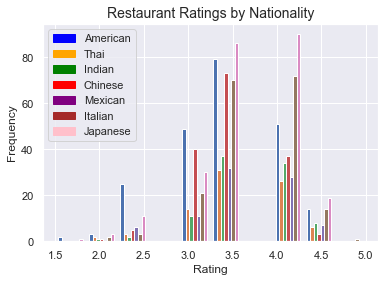

In [291]:
american = df[df.categories.str.contains('American')]
thai = df[df.categories.str.contains('Thai')]
indian = df[df.categories.str.contains('Indian')]
chinese = df[df.categories.str.contains('Chinese')]
mexican = df[df.categories.str.contains('Mexican')]
italian = df[df.categories.str.contains('Italian')]
japanese = df[df.categories.str.contains('Japanese')]

plt.hist([american.stars, thai.stars, indian.stars, chinese.stars, mexican.stars, italian.stars, japanese.stars])
plt.title('Restaurant Ratings by Nationality', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')

blue_patch = mpatches.Patch(color='blue', label='American')
orange_patch = mpatches.Patch(color='orange', label='Thai')
green_patch = mpatches.Patch(color='green', label='Indian')
red_patch = mpatches.Patch(color='red', label='Chinese')
purple_patch = mpatches.Patch(color='purple', label='Mexican')
brown_patch = mpatches.Patch(color='brown', label='Italian')
pink_patch = mpatches.Patch(color='pink', label='Japanese')

plt.legend(handles=[blue_patch, orange_patch, green_patch, red_patch, purple_patch, brown_patch, pink_patch])
plt.savefig('nationality_ratings.png')

In [299]:
anova = stats.f_oneway(american.stars, thai.stars, indian.stars, chinese.stars, mexican.stars, italian.stars, japanese.stars)
# melt = pd.melt(df)
print("anova p-value of", anova.pvalue, "means that there is a difference amongst")
print("the means of the algorithms and we can conduct a post-hoc analysis")


anova p-value of 1.1477238206744112e-07 means that there is a difference amongst
the means of the algorithms and we can conduct a post-hoc analysis


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"